In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading demographic data
demographics = pd.read_csv('datasets\demographic.csv')

demographics = demographics[demographics['year'] >= 1985] 
demographics = demographics[demographics['year'] <= 2015]

demographics


,country,year,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,population,migration,political_stability,country_code
25,AFGHANISTAN,1985,NaN,NaN,NaN,45.566,7.458,11783050.0,NaN,NaN,AFG
26,AFGHANISTAN,1986,NaN,NaN,NaN,46.417,7.460,11601041.0,NaN,NaN,AFG
27,AFGHANISTAN,1987,NaN,NaN,NaN,47.288,7.461,11502761.0,-1484185.0,NaN,AFG
28,AFGHANISTAN,1988,NaN,NaN,NaN,48.164,7.461,11540888.0,NaN,NaN,AFG
29,AFGHANISTAN,1989,NaN,NaN,NaN,49.028,7.461,11777609.0,NaN,NaN,AFG
30,AFGHANISTAN,1990,NaN,NaN,NaN,49.856,7.466,12249114.0,NaN,NaN,AFG
31,AFGHANISTAN,1991,NaN,NaN,NaN,50.627,7.479,12993657.0,NaN,NaN,AFG
32,AFGHANISTAN,1992,NaN,NaN,NaN,51.331,7.502,13981231.0,2327473.0,NaN,AFG
33,AFGHANISTAN,1993,NaN,NaN,NaN,51.968,7.535,15095099.0,NaN,NaN,AFG
34,AFGHANISTAN,1994,NaN,NaN,NaN,52.539,7.572,16172719.0,NaN,NaN,AFG


In [2]:
#loading suicides data
suicides = pd.read_csv('datasets\suicide-rates-overview-1985-to-2016.csv')

suicides = suicides[suicides['year'] >= 1985]
suicides = suicides[suicides['year'] <= 2015]
suicides = suicides.drop("country-year", axis=1)

suicides.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [3]:
#adding country codes to suicides dataframe
countryCodes = pd.read_csv('datasets\wikipedia-iso-country-codes.csv')
suicides = pd.merge(suicides,countryCodes[['country','country_code']],on='country')

continents = pd.read_csv("datasets\country-and-continent-codes-list.csv")
continents = continents.rename (columns = {'Three_Letter_Country_Code': 'country_code'})
suicides = pd.merge(suicides,continents[['country_code','Continent_Name']],on='country_code')

suicides.head

<bound method NDFrame.head of           country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
5         Albania  1987  female    75+ years            1       35600   
6         Albania  1987  female  35-54 years            6      278800   
7         Albania  1987  female  25-34 years            4      257200   
8         Albania  1987    male  55-74 years            1      137500   
9         Albania  1987  female   5-14 years            0      311000   
10        Albania  1987  female  55-74 years            0      144600   
11        Albania  1987    male   5-14 years            0      338200   
12        Albania  19

In [4]:
#merging suicides and demographics
suicides = pd.merge(suicides,demographics,on=['year','country_code'])
suicides = suicides.drop(['country_y','population_y'], axis=1)
suicides = suicides.rename (columns = {'country_x': 'country', 'population_x': 'population_by_age'})
suicides.reset_index(drop=True)
suicides.head()

,country,year,sex,age,suicides_no,population_by_age,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,generation,country_code,Continent_Name,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,migration,political_stability
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN


In [5]:
#pd.crosstab(suicides.country, suicides.suicides_no, margins=True)
suicidesPerCountry=suicides.groupby(['country','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicides = pd.merge(suicides,suicidesPerCountry[['population_by_age']],on=['country','year'])
suicides.drop('population_by_age_x', axis=1)
suicides = suicides.rename(columns={'population_by_age_y':'total_population'})
suicides = suicides.rename(columns={'population_by_age_x':'population_by_age'})
suicidesPerCountry['suicides_per_100k_pop']=suicidesPerCountry['suicides_no']/suicidesPerCountry['population_by_age']*100000
suicidesPerCountry.head()


suicides_no  population_by_age  suicides_per_100k_pop
country year                                                       
Albania 1987           73            2709600               2.694125
        1988           63            2764300               2.279058
        1989           68            2803100               2.425886
        1992           47            2822500               1.665190
        1993           73            2807300               2.600363

In [6]:
suicides.head()

,country,year,sex,age,suicides_no,population_by_age,suicides_per_100k_pop,HDI_for_year,gdp_for_year_USD,gdp_per_capita_USD,...,country_code,Continent_Name,gnp_per_capita,inflation,industry,life_expectancy,total_fertility_rate,migration,political_stability,total_population
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,...,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,...,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,...,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,...,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,...,ALB,Europe,760.0,0.000029,NaN,71.76,3.164,-99.0,NaN,2709600


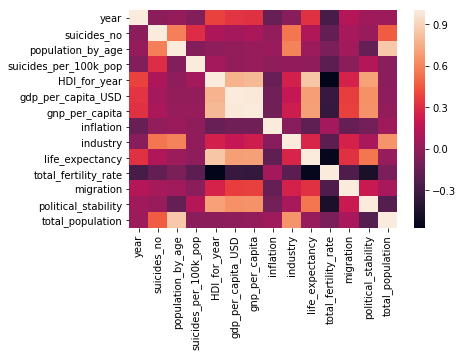

In [7]:
corr = suicides.corr()
plot_fig=sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plot_fig.figure.savefig("plots\correlation.png")

In [8]:
suicidesPerYearPer100k = suicides.groupby(['year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerYearPer100k = suicidesPerYearPer100k.rename(columns = {'population_by_age': 'total_population'})
suicidesPerYearPer100k ['suicides_per_100k_pop'] = suicidesPerYearPer100k['suicides_no']/suicidesPerYearPer100k['total_population']*100000
suicidesPerYearPer100k = suicidesPerYearPer100k.reset_index()
suicidesPerYearPer100k.head()

,year,suicides_no,total_population,suicides_per_100k_pop
0,1985,82896,749796312,11.055803
1,1986,86211,768092543,11.224038
2,1987,92625,830204029,11.156896
3,1988,87515,786772760,11.123288
4,1989,88901,820164243,10.839414


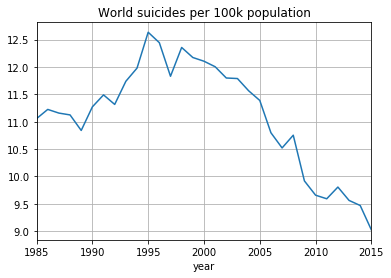

In [9]:
#suicidesByGenre=suicides.groupby(['country','sex']).agg({'suicides_per_100k_pop': 'sum'})
#suicidesByGenre
suicidesPerYearPer100k.plot(x='year', y='suicides_per_100k_pop', legend=False)
plt.grid()
plt.title('World suicides per 100k population')
plt.savefig("plots\world_suicide_rate.png")

In [10]:
suicidesPerYearPer100kContinents = suicides.groupby(['Continent_Name','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerYearPer100kContinents = suicidesPerYearPer100kContinents.rename(columns = {'population_by_age': 'total_population'})
suicidesPerYearPer100kContinents ['suicides_per_100k_pop'] = suicidesPerYearPer100kContinents['suicides_no']/suicidesPerYearPer100kContinents['total_population']*100000
suicidesPerYearPer100kContinents = suicidesPerYearPer100kContinents.reset_index(drop=False)

suicidesPerYearPer100kContinents.head()

,Continent_Name,year,suicides_no,total_population,suicides_per_100k_pop
0,Africa,1985,112,940700,11.906027
1,Africa,1986,29,955500,3.035060
2,Africa,1987,143,969600,14.748350
3,Africa,1988,167,925000,18.054054
4,Africa,1989,144,932900,15.435738


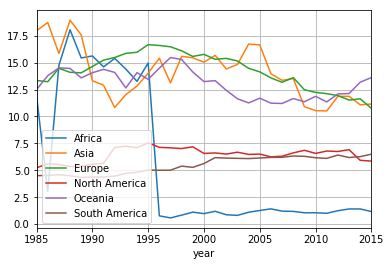

In [11]:
fig, ax = plt.subplots()

for key, grp in suicidesPerYearPer100kContinents.groupby(['Continent_Name']):
    ax = grp.plot(ax=ax, kind='line', x='year', y='suicides_per_100k_pop', label=key)

plt.legend(loc='best')
plt.grid()
plt.show()
plt.title = ('World suicides rates per continent')

ax.get_figure().savefig("plots\suicide_rates_per_continent.png")

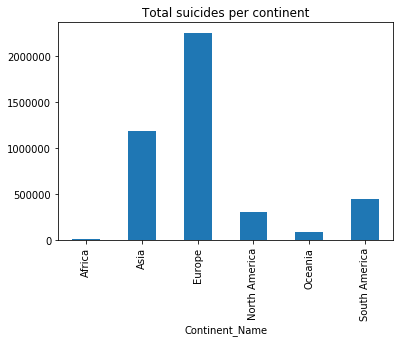

In [12]:
totalSuicidesPerYearPer100kContinents = suicides.groupby(['Continent_Name']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPerYearPer100kContinents = totalSuicidesPerYearPer100kContinents.rename(columns = {'population_by_age': 'total_population'})
totalSuicidesPerYearPer100kContinents ['suicides_per_100k_pop'] = totalSuicidesPerYearPer100kContinents['suicides_no']/totalSuicidesPerYearPer100kContinents['total_population']*100000

totalSuicidesPerYearPer100kContinents.plot(y='suicides_no', kind='bar', legend=False, label='', title='Total suicides per continent')
plt.savefig(r"plots\total_suicides_per_continent.png")

In [13]:
suicidesPerGenderPer100k = suicides.groupby(['sex','year']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
suicidesPerGenderPer100k = suicidesPerGenderPer100k.rename(columns = {'population_by_age': 'total_population'})
suicidesPerGenderPer100k ['suicides_per_100k_pop'] = suicidesPerGenderPer100k['suicides_no']/suicidesPerGenderPer100k['total_population']*100000
suicidesPerGenderPer100k = suicidesPerGenderPer100k.reset_index(drop=False)

suicidesPerGenderPer100k.head()

,sex,year,suicides_no,total_population,suicides_per_100k_pop
0,female,1985,25168,380130063,6.620892
1,female,1986,26250,390255503,6.726363
2,female,1987,27555,423479586,6.506807
3,female,1988,25807,401792222,6.422972
4,female,1989,25742,418756685,6.147245


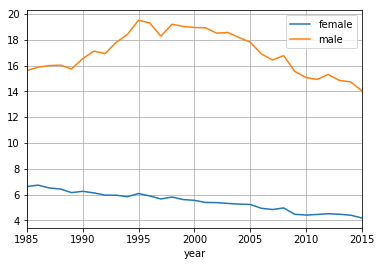

In [14]:
fig, ax = plt.subplots()

for key, grp in suicidesPerGenderPer100k.groupby(['sex']):
    ax = grp.plot(ax=ax, kind='line', x='year', y='suicides_per_100k_pop', label=key)

plt.legend(loc='best')
plt.grid()
plt.show()
plt.title = ('World suicides rates per gender')

ax.get_figure().savefig("plots\suicide_rates_per_gender.png")

In [15]:
totalSuicidesPerGenderPer100k = suicides.groupby(['sex']).agg({'suicides_no': 'sum', 'population_by_age':'sum'})
totalSuicidesPerGenderPer100k = totalSuicidesPerGenderPer100k.rename(columns = {'population_by_age': 'total_population'})

totalSuicidesPerGenderPer100k.head()



,suicides_no,total_population
sex,,
female,1053040,19748031590
male,3219283,18957071447


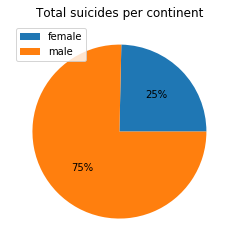

In [16]:
totalSuicidesPerGenderPer100k.plot(x='sex', y='suicides_no', kind='pie', autopct='%1.0f%%', label='', labels=None, title='Total suicides per continent')
plt.savefig(r"plots\total_suicides_by_gender.png")